In [143]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20,20)

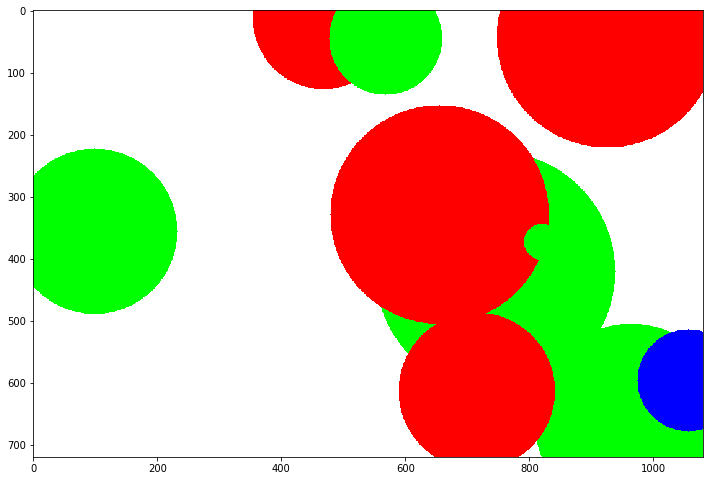

In [124]:
image = np.zeros((720, 1080, 3), np.uint8)
height, width = image.shape[:2]
image[:] = (255, 255, 255)
for i in range(10):
    pick = np.random.randint(0, 3)
    color = [0, 0, 0]
    color[pick] = 255
    center = (np.random.randint(0, width), np.random.randint(0, height))
    cv.circle(image, center, np.random.randint(20, 200), color, -1)
plt.imshow(image)
plt.show()

In [125]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [126]:
n_lines = 80
mask = np.zeros((height, width, 1), np.uint8)
line_jump = height // (n_lines - 40)
for i in range(n_lines):
    h = line_jump * i
    cv.line(mask, (0, h), (width, h), (255, 255, 255), 4)

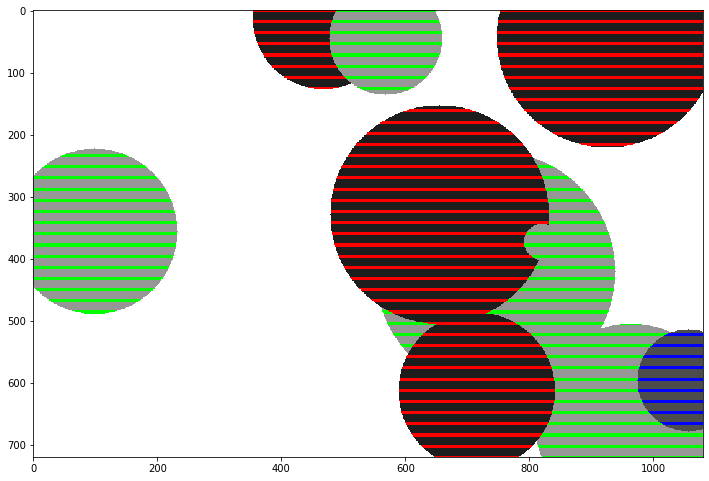

In [127]:
image = cv.bitwise_and(image, image, mask=mask)
_, mask = cv.threshold(mask, 1, 255, cv.THRESH_BINARY)
inv = np.bitwise_not(mask)
gray = cv.bitwise_and(gray, gray, mask=inv)
res = cv.bitwise_or(cv.cvtColor(gray, cv.COLOR_GRAY2BGR), image)
plt.imshow(res)
plt.show()

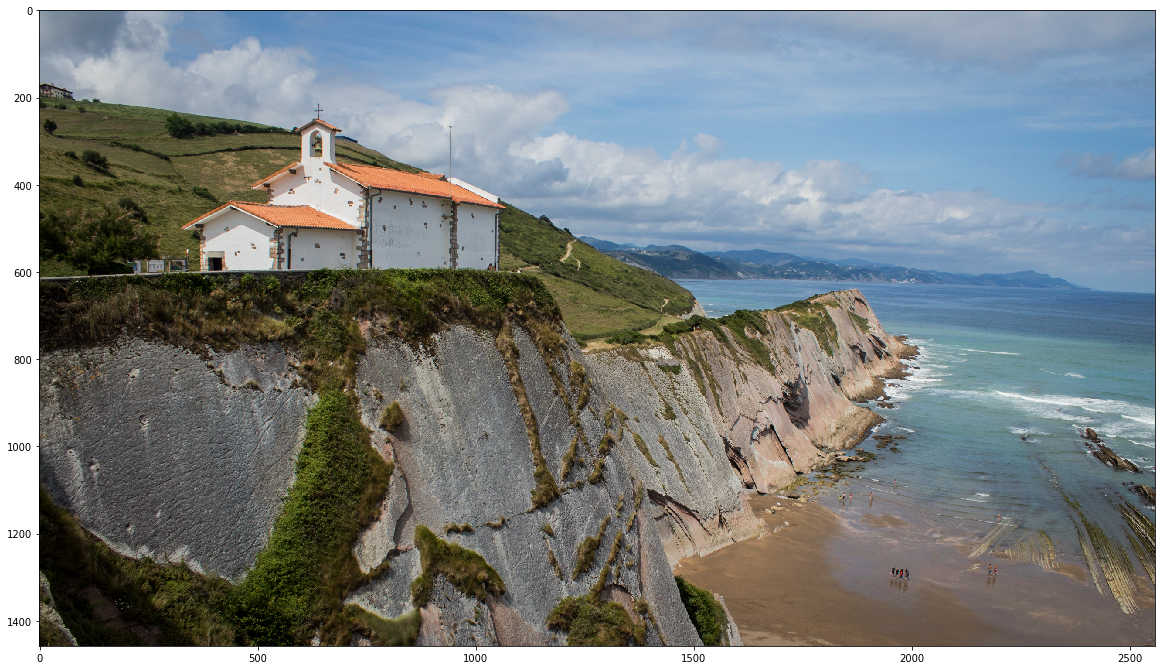

In [162]:
n_lines = 115
image = cv.imread('ermita.jpg')
height, width = image.shape[:2]
image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
plt.imshow(image)
plt.show()

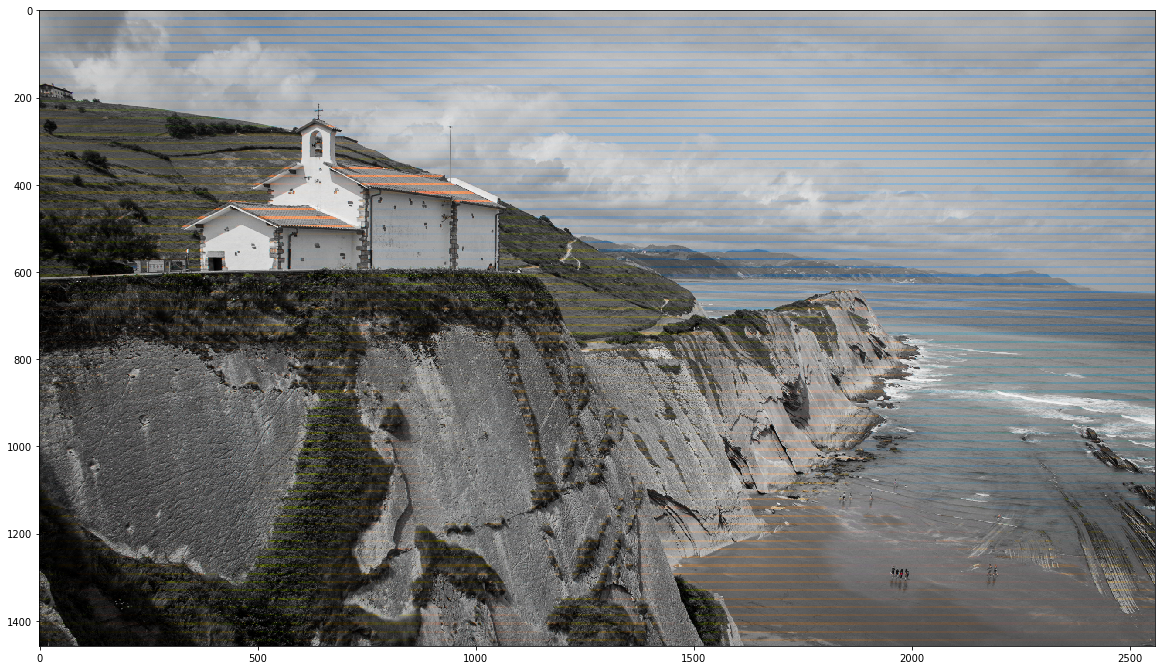

In [163]:
height, width = image.shape[:2]

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

mask = np.zeros((height, width, 1), np.uint8)
line_jump = height // (n_lines - 40)
for i in range(n_lines):
    h = line_jump * i
    cv.line(mask, (0, h), (width, h), (255, 255, 255), 3)

image = cv.bitwise_and(image, image, mask=mask)
_, mask = cv.threshold(mask, 1, 255, cv.THRESH_BINARY)
inv = np.bitwise_not(mask)
gray = cv.bitwise_and(gray, gray, mask=inv)

res = cv.bitwise_or(cv.cvtColor(gray, cv.COLOR_GRAY2BGR), image)
plt.imshow(res)
plt.show()

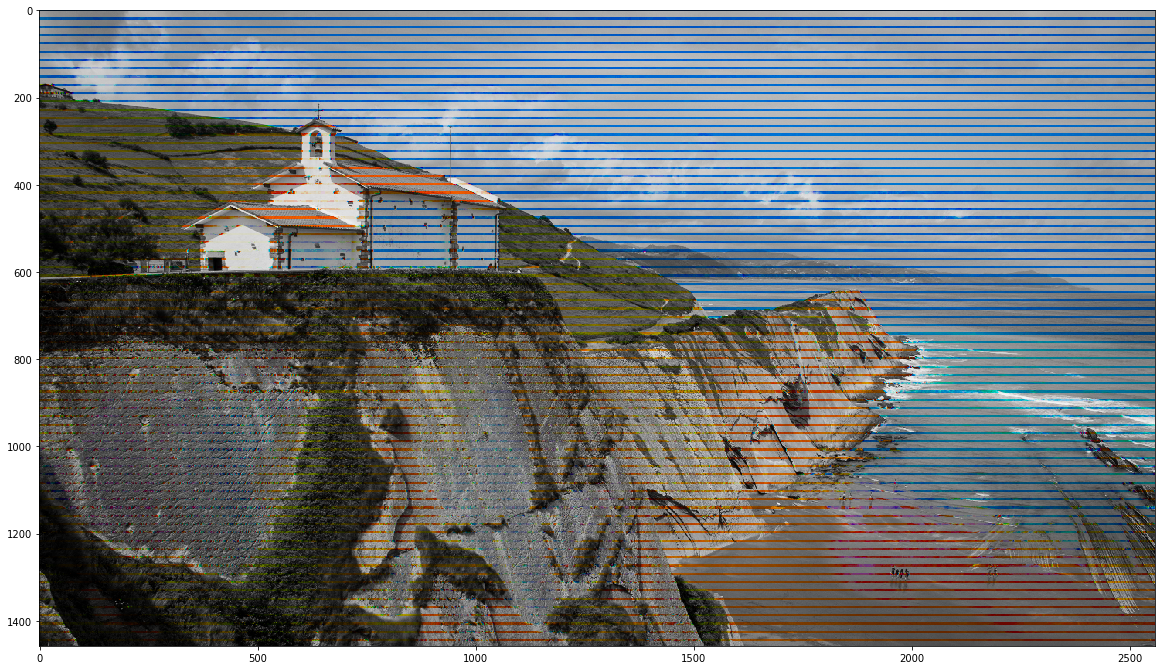

In [164]:
# Stack Overflow
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV).astype("float32")
h, s, v = cv.split(hsv)
s = s * 10
s = np.clip(s, 0, 255)
hsv = cv.merge([h, s, v])
image = cv.cvtColor(hsv.astype("uint8"), cv.COLOR_HSV2BGR)

res = cv.bitwise_or(cv.cvtColor(gray, cv.COLOR_GRAY2BGR), image)
plt.imshow(res)
plt.show()